# Forest Cover Type

The goal of this project is to predict the correct forest cover type (defined as an integer between 1 and 7), out of 7 possibilities:

1. Spruce/Fir
2. Lodgepole Pine
3. Ponderosa Pine
4. Cottonwood/Willow
5. Aspen
6. Douglas-fir
7. Krummholz

The predictions are evaluated using multi-class classification accuracy.

This study area includes four wilderness areas located in the Roosevelt National Forest of northern Colorado. 

The features are:
- Elevation - Elevation in meters
- Aspect - Aspect in degrees azimuth
- Slope - Slope in degrees
- Horizontal_Distance_To_Hydrology - Horz Dist to nearest surface water features
- Vertical_Distance_To_Hydrology - Vert Dist to nearest surface water features
- Horizontal_Distance_To_Roadways - Horz Dist to nearest roadway
- Hillshade_9am (0 to 255 index) - Hillshade index at 9am, summer solstice
- Hillshade_Noon (0 to 255 index) - Hillshade index at noon, summer solstice
- Hillshade_3pm (0 to 255 index) - Hillshade index at 3pm, summer solstice
- Horizontal_Distance_To_Fire_Points - Horz Dist to nearest wildfire ignition points
- Wilderness_Area (4 binary columns, 0 = absence or 1 = presence) - Wilderness area designation
- Soil_Type (40 binary columns, 0 = absence or 1 = presence) - Soil Type designation
- Cover_Type (7 types, integers 1 to 7) - Forest Cover Type designation

The wilderness areas are:

1. Rawah Wilderness Area
2. Neota Wilderness Area
3. Comanche Peak Wilderness Area
4. Cache la Poudre Wilderness Area

The 40 soil types can be found in the data section. 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

#import os
#print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

In [23]:
local_path = "./data/"
kaggle_path = "../input/"

train = pd.read_csv(local_path+"train.csv")
# Holdout for 'test' to avoid confusing when splitting training data into train/test
holdout = pd.read_csv(local_path+"test.csv") 

train.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


In [4]:
# Get info on data type and missing values
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15120 entries, 4274 to 7135
Data columns (total 55 columns):
Elevation                             15120 non-null int64
Aspect                                15120 non-null int64
Slope                                 15120 non-null int64
Horizontal_Distance_To_Hydrology      15120 non-null int64
Vertical_Distance_To_Hydrology        15120 non-null int64
Horizontal_Distance_To_Roadways       15120 non-null int64
Hillshade_9am                         15120 non-null int64
Hillshade_Noon                        15120 non-null int64
Hillshade_3pm                         15120 non-null int64
Horizontal_Distance_To_Fire_Points    15120 non-null int64
Wilderness_Area1                      15120 non-null int64
Wilderness_Area2                      15120 non-null int64
Wilderness_Area3                      15120 non-null int64
Wilderness_Area4                      15120 non-null int64
Soil_Type1                            15120 non-null int64
Soil

In [5]:
# All columns are numerical. Let's take a closer look:
train.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
count,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,...,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000,15120.000000
mean,2749.322553,156.676653,16.501587,227.195701,51.076521,1714.023214,212.704299,218.965608,135.091997,1511.147288,...,0.045635,0.040741,0.001455,0.006746,0.000661,0.002249,0.048148,0.043452,0.030357,4.000000
std,417.678187,110.085801,8.453927,210.075296,61.239406,1325.066358,30.561287,22.801966,45.895189,1099.936493,...,0.208699,0.197696,0.038118,0.081859,0.025710,0.047368,0.214086,0.203880,0.171574,2.000066
min,1863.000000,0.000000,0.000000,0.000000,-146.000000,0.000000,0.000000,99.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2376.000000,65.000000,10.000000,67.000000,5.000000,764.000000,196.000000,207.000000,106.000000,730.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,2752.000000,126.000000,15.000000,180.000000,32.000000,1316.000000,220.000000,223.000000,138.000000,1256.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,3104.000000,261.000000,22.000000,330.000000,79.000000,2270.000000,235.000000,235.000000,167.000000,1988.250000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
max,3849.000000,360.000000,52.000000,1343.000000,554.000000,6890.000000,254.000000,254.000000,248.000000,6993.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


A first look at the data shows:

- there are no missing values, 
- all our columns are numerical (integer),
- there are 15,120 observations in our train dataframe, and 56 columns (out of which 40 are dedicated to soil types),
- the categorical explanatory variables are all already dummy coded. 

## EDA
Let's take a closer look at the different features we have available.

We'll start with the target variable:
- is it equally distributed in the data set?
- is there an order to it? 
- is there any transformation that needs to happen?

Then the features:
- Can we find relationships between specific features and the target?

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
train["Cover_Type"].value_counts()

7    2160
6    2160
5    2160
4    2160
3    2160
2    2160
1    2160
Name: Cover_Type, dtype: int64

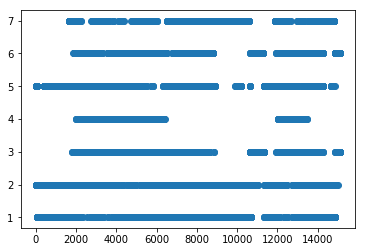

In [24]:
plt.scatter(train["Id"],train["Cover_Type"])

In [25]:
# Drop the Id column from the train dataframe as it's leaking info.
train = train.drop("Id", axis=1)

# Shuffle the order of the dataframe as there seems to be an order to it. 
random_order = np.random.permutation(len(train))
train = train.loc[random_order]

### Explanatory Variables

In [26]:
# Splitting train into different sub dataframe with similar features
train_elassl = pd.concat([train.iloc[:,0:3],train.iloc[:, -1]], axis=1)
train_distance = pd.concat([train.iloc[:,3:6],train.iloc[:,9],train.iloc[:, -1]], axis=1)
train_hillshade = pd.concat([train.iloc[:,6:9],train.iloc[:, -1]], axis=1)
train_wilderness = pd.concat([train.iloc[:,10:14],train.iloc[:, -1]], axis=1)

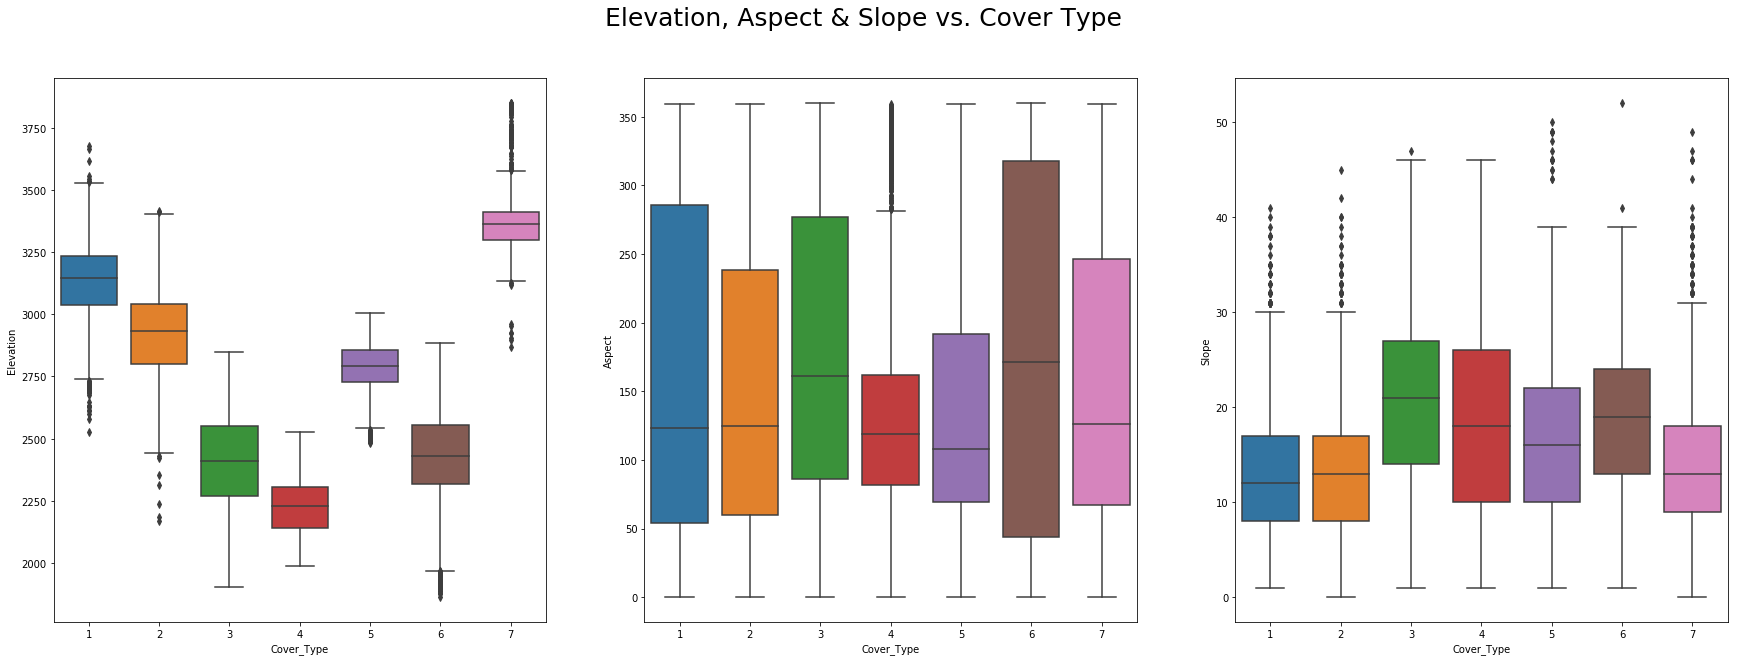

In [27]:
fig = plt.figure(figsize=(30,10))
for i, col in enumerate(train_elassl.columns[:-1]):  
    ax = fig.add_subplot(int("13"+str(i+1)))
    sns.boxplot(x='Cover_Type', y=col, data=train)
fig.suptitle('Elevation, Aspect & Slope vs. Cover Type', fontsize =25)
plt.show()

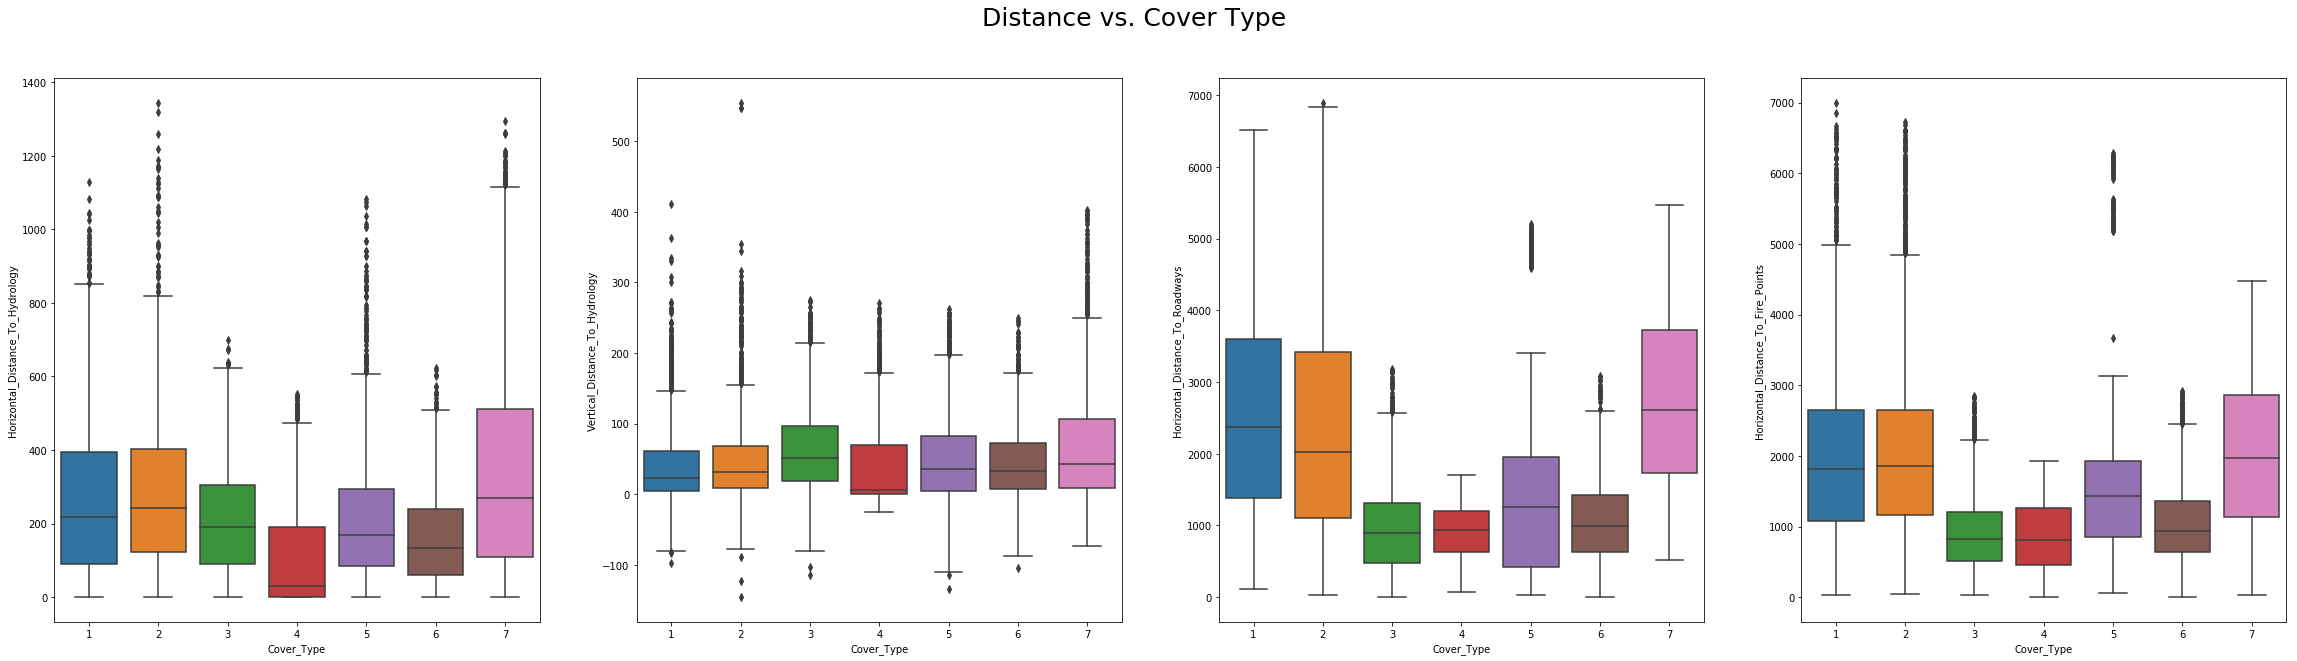

In [28]:
fig = plt.figure(figsize=(40,10))
for i, col in enumerate(train_distance.columns[:-1]):  
    ax = fig.add_subplot(int("14"+str(i+1)))
    sns.boxplot(x='Cover_Type', y=col, data=train)
fig.suptitle('Distance vs. Cover Type', fontsize =25)

plt.show()

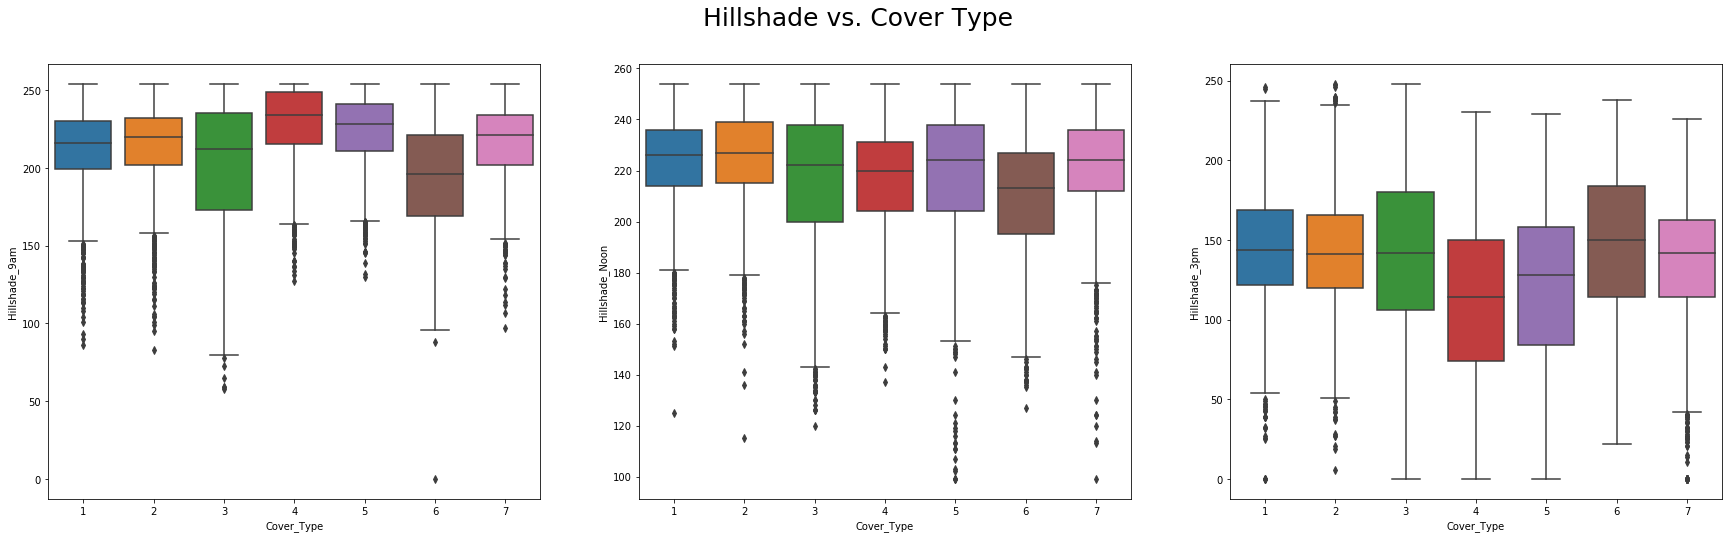

In [29]:
fig = plt.figure(figsize=(30,8))
for i, col in enumerate(train_hillshade.columns[:-1]):  
    ax = fig.add_subplot(int("13"+str(i+1)))
    sns.boxplot(x='Cover_Type', y=col, data=train)
fig.suptitle('Hillshade vs. Cover Type', fontsize =25)
plt.show()

Text(0.5,0.98,'Wilderness Areas vs. Cover Type')

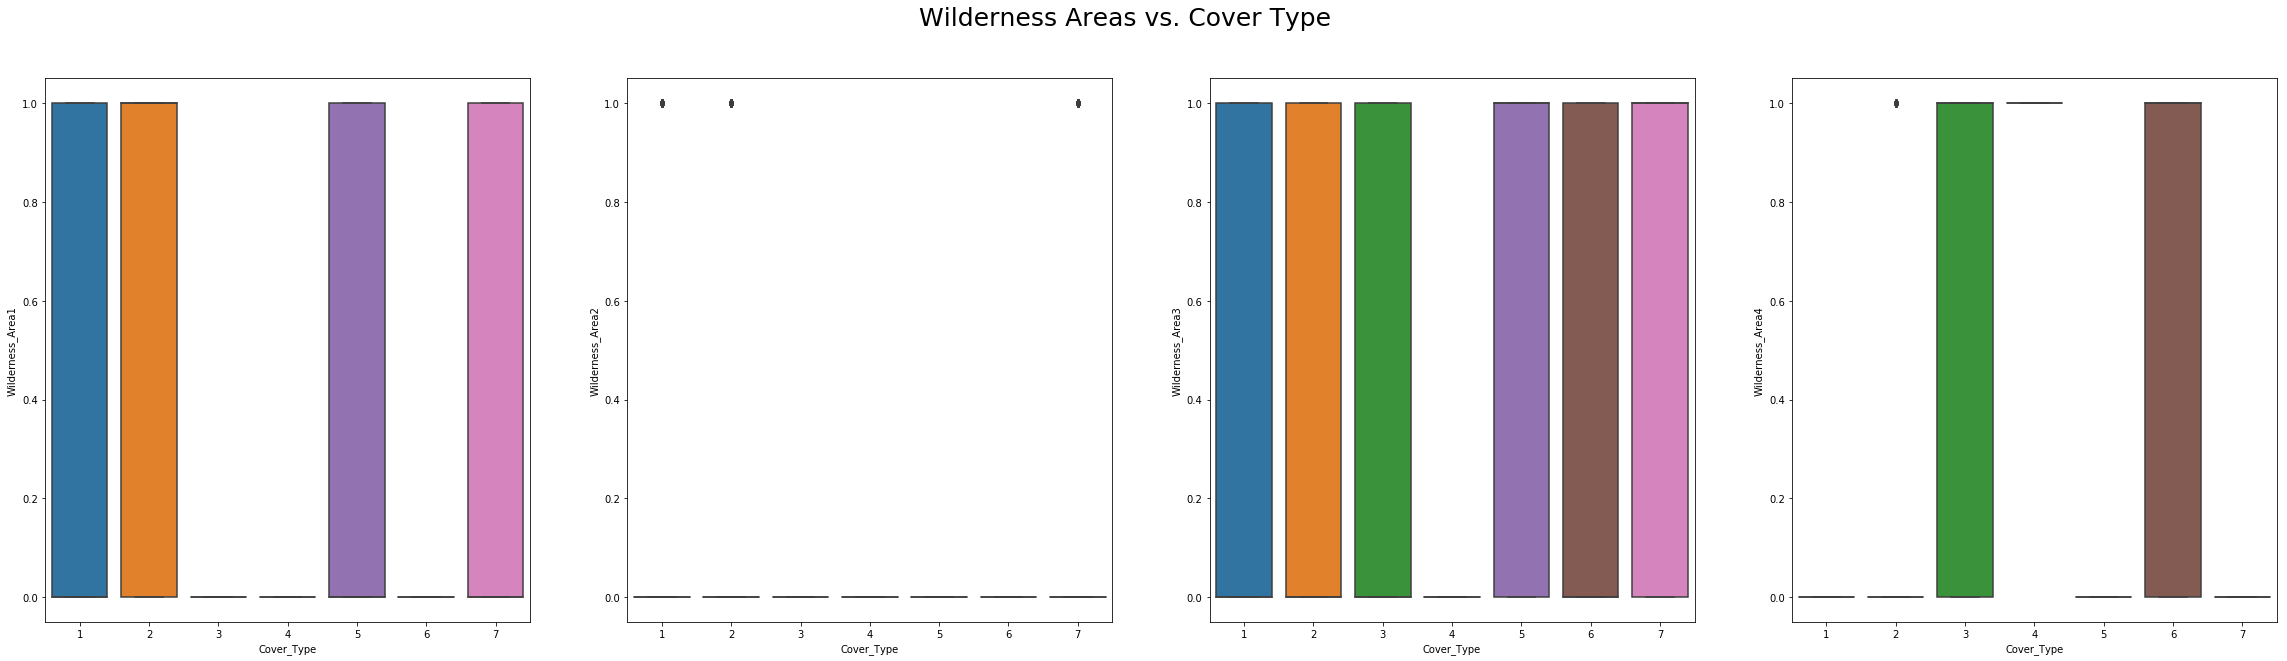

In [30]:
fig = plt.figure(figsize=(40,10))
for i, col in enumerate(train_wilderness.columns[:-1]):  
    ax = fig.add_subplot(fig.add_subplot(int("14"+str(i+1))))
    sns.boxplot(x='Cover_Type', y=col, data=train)
    
fig.suptitle('Wilderness Areas vs. Cover Type', fontsize =25)

As the Wilderness Areas are already 'dummy coded', boxplots are not such helpful visualizations.
Below, we look at value counts to get a better understanding of the cover type per wilderness area.
We'll also do the same for the soil types. 

In [127]:
w1 = train[train["Wilderness_Area1"]==1]
w1["Cover_Type"].value_counts()

2    1134
1    1062
5     856
7     545
Name: Cover_Type, dtype: int64

In [126]:
w2 = train[train["Wilderness_Area2"]==1]
w2["Cover_Type"].value_counts()

7    252
1    181
2     66
Name: Cover_Type, dtype: int64

In [125]:
w3 = train[train["Wilderness_Area3"]==1]
w3["Cover_Type"].value_counts()

7    1363
5    1304
6     962
2     940
1     917
3     863
Name: Cover_Type, dtype: int64

In [128]:
w4 = train[train["Wilderness_Area4"]==1]
w4["Cover_Type"].value_counts()

4    2160
3    1297
6    1198
2      20
Name: Cover_Type, dtype: int64

In [132]:
for i in range(1, 41):
    colname = "Soil_Type" + str(i)
    subset = train[train[colname]==1]
    print(colname)
    print(subset["Cover_Type"].value_counts())

Soil_Type1
4    139
3    121
6     95
Name: Cover_Type, dtype: int64
Soil_Type2
3    283
6    182
4     94
5     61
2      3
Name: Cover_Type, dtype: int64
Soil_Type3
4    799
3    133
6     18
2     12
Name: Cover_Type, dtype: int64
Soil_Type4
3    462
4    133
5    129
6     87
2     20
7      7
1      5
Name: Cover_Type, dtype: int64
Soil_Type5
6    71
3    55
4    39
Name: Cover_Type, dtype: int64
Soil_Type6
3    248
4    244
6    151
2      7
Name: Cover_Type, dtype: int64
Soil_Type7
Series([], Name: Cover_Type, dtype: int64)
Soil_Type8
2    1
Name: Cover_Type, dtype: int64
Soil_Type9
2    9
1    1
Name: Cover_Type, dtype: int64
Soil_Type10
6    1101
3     717
4     170
2      81
5      64
1       9
Name: Cover_Type, dtype: int64
Soil_Type11
5    154
3     89
6     67
2     67
4     24
1      5
Name: Cover_Type, dtype: int64
Soil_Type12
2    203
1     24
Name: Cover_Type, dtype: int64
Soil_Type13
5    305
2     84
6     66
1     17
3      4
Name: Cover_Type, dtype: int64
Soil_Type

Findings:
* Clear correlation between elevation and cover types
* Clear correlation between the different wilderness areas and the cover types
* Clear correlation between the various soil types and the cover types
* The 7 cover types are equally distributed in our data set. As a result, we won't need to correct inbalance. 

## Engineering New Features

At the moment, I don't see any feature engineering necessary. It might be relevant in the future to group soil types together to avoid overfitting, but for now, let's move on without.

## Testing different simple models
We'll first split our dataset into a train and a test datasets.

We'll then check the accuracy of different models, without any tuning or complexity. 
We'll use both the train/test to check accuracy, and the cross validation method, which allows for more reliable error measurements. 

In [31]:
# Let's start with splitting our data into train/test
from sklearn.model_selection import train_test_split

all_X = train.drop("Cover_Type",axis=1)
all_y = train["Cover_Type"]

train_X, test_X, train_y, test_y = train_test_split(all_X, all_y, test_size=.2, random_state=0)
feat_labels = train_X.columns

### Logistic regression

In [32]:
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(train_X, train_y)

predictions = lr.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.6752645502645502


In [33]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.67724868 0.67857143 0.66005291 0.66798942 0.65343915 0.66534392
 0.67261905 0.66071429 0.66997354 0.66798942]
0.6673941798941798


In [50]:
from sklearn.model_selection import cross_val_score
import numpy as np

lr = LogisticRegression()
scores = cross_val_score(lr, all_X, all_y, cv=25)
lr_accuracy = np.mean(scores)
accuracies = []
accuracies.append(lr_accuracy)
print(lr_accuracy)

0.6685805934242182


Using cross-validation, and 25 folds, we achieved an accuracy of 66.9% with logistic regression.
Let's see if we get better results with decision trees. 

### Decision Tree 

In [51]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(train_X, train_y)

predictions = dt.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7870370370370371


In [36]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.79695767 0.7989418  0.79431217 0.79761905 0.78769841 0.80489418
 0.81216931 0.78240741 0.79232804 0.79166667]
0.795899470899471


In [52]:
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, all_X, all_y, cv=25)
dt_accuracy = np.mean(scores)
accuracies.append(dt_accuracy)
print(dt_accuracy)

0.7956764806965287


The decision tree model from scikit learn performs better than the logistic regression model. 

### Random forest

In [38]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()
rf.fit(train_X, train_y)

predictions = rf.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.8359788359788359


In [39]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.84193122 0.83333333 0.84126984 0.84193122 0.84060847 0.84126984
 0.84854497 0.84457672 0.83730159 0.82936508]
0.8400132275132275


In [53]:
rf = RandomForestClassifier()

scores = cross_val_score(rf, all_X, all_y, cv=25)
rf_accuracy = np.mean(scores)
accuracies.append(rf_accuracy)
print(rf_accuracy)

0.8390132508496582


The random forest model outperforms both the logistic regression and the decision tree classifier models with default settings. 

### K Neighbors

In [46]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(train_X, train_y)

predictions = knn.predict(test_X)
accuracy = accuracy_score(test_y, predictions)
print(accuracy)

0.7996031746031746


In [47]:
knn = KNeighborsClassifier()

scores = cross_val_score(knn, all_X, all_y, cv=10)
accuracy = np.mean(scores)
print(scores)
print(accuracy)

[0.81547619 0.81746032 0.80489418 0.80886243 0.79960317 0.81746032
 0.8287037  0.80291005 0.82275132 0.81547619]
0.8133597883597883


In [54]:
knn = KNeighborsClassifier()

scores = cross_val_score(knn, all_X, all_y, cv=25)
knn_accuracy = np.mean(scores)
accuracies.append(knn_accuracy)
print(knn_accuracy)

0.8201046320693473


Finally, the K nearest neighbors model, with default settings, performed really well, but not as high as the random forest classifier. 

In [57]:
model_name = ["LogR", "Tree", "RandomF", "KNN"]
accuracy_summary = pd.Series(accuracies, index=model_name)
accuracy_summary = accuracy_summary.sort_values(ascending=False)
print(accuracy_summary)

RandomF    0.839013
KNN        0.820105
Tree       0.795676
LogR       0.668581
dtype: float64


## Determining the Most Relevant Features
When testing various simple models, without any fine tuning, the random forest classifier model performed best. 
Let's use it to determine the most relevant features. 

In [91]:
# Fit model
rf = RandomForestClassifier(n_estimators=10000, random_state=0, n_jobs=-1)
rf.fit(all_X, all_y)

# Print the name and gini importance of each feature
for feature in zip(feat_labels, rf.feature_importances_):
    print(feature)

('Elevation', 0.2245703922457845)
('Aspect', 0.0495069476835203)
('Slope', 0.03627169124140162)
('Horizontal_Distance_To_Hydrology', 0.06224657899826843)
('Vertical_Distance_To_Hydrology', 0.05367683709354754)
('Horizontal_Distance_To_Roadways', 0.09281194472197814)
('Hillshade_9am', 0.051215365107466604)
('Hillshade_Noon', 0.0445754206750646)
('Hillshade_3pm', 0.04611805853661619)
('Horizontal_Distance_To_Fire_Points', 0.07321896450866822)
('Wilderness_Area1', 0.01798901576973889)
('Wilderness_Area2', 0.003793058136938862)
('Wilderness_Area3', 0.016976837499295492)
('Wilderness_Area4', 0.04510086302115764)
('Soil_Type1', 0.001701714478488155)
('Soil_Type2', 0.006384913633609718)
('Soil_Type3', 0.019147644522499424)
('Soil_Type4', 0.012568512095491808)
('Soil_Type5', 0.0012306318082431521)
('Soil_Type6', 0.002882569290901409)
('Soil_Type7', 0.0)
('Soil_Type8', 3.950888385864652e-06)
('Soil_Type9', 0.00011080386871563528)
('Soil_Type10', 0.022956413481975114)
('Soil_Type11', 0.003263701

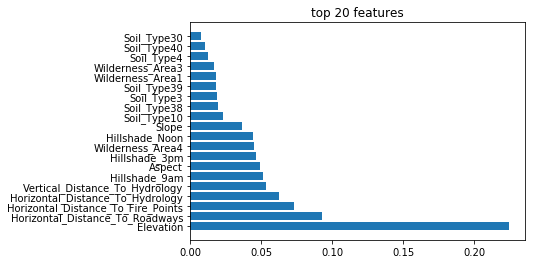

In [120]:
df = pd.Series(rf.feature_importances_, index=feat_labels)
df = df.sort_values(ascending=False)
df.head()
plt.barh(df.index[:20],df[:20])
plt.title("top 20 features")
plt.show()

In [92]:
from sklearn.feature_selection import SelectFromModel
# Create a selector object that will use the random forest classifier to identify
# features that have an importance of more than 0.05 (with higher threshold, only elevation is returned..)
sfm = SelectFromModel(rf, threshold=0.05)

# Train the selector
sfm.fit(all_X, all_y)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10000, n_jobs=-1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
        norm_order=1, prefit=False, threshold=0.05)

In [93]:
# Print the names of the most important features
for feature_list_index in sfm.get_support(indices=True):
    print(feat_labels[feature_list_index])

Elevation
Horizontal_Distance_To_Hydrology
Vertical_Distance_To_Hydrology
Horizontal_Distance_To_Roadways
Hillshade_9am
Horizontal_Distance_To_Fire_Points


## Selecting the Best-Performing Features

Let's use scikit-learn's feature_selection.RFECV class to automate selecting the best-performing features using recursive feature elimination.

To speed up our  workflow, we'll create a function that performs this step for us.

We'll need an estimator as the first parameter when we instantiate a RFECV() object. We've  discovered in the Model Selection and Tuning mission that Random Forests seems to be a better algorithm for this Kaggle competition.

**Note**: future dev, create similar function for the other feature selection (SelectfromModel) and see model performance with that one. 

In [58]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier

def select_features(df):
    all_X = df.drop("Cover_Type", axis=1)
    all_y = df["Cover_Type"]
    
    clf = RandomForestClassifier(random_state=1)
    selector = RFECV(clf, cv=10)
    selector.fit(all_X, all_y)
    
    best_columns = list(all_X.columns[selector.support_])
    print("Best Columns \n"+"-"*12+"\n{}\n".format(best_columns))
    return best_columns
    
best_columns_rfecv = select_features(train)

Best Columns 
------------
['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type16', 'Soil_Type17', 'Soil_Type20', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type35', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40']



## Selecting and Tuning Different Algorithms
The function below test various models and hyperparameters, and select the best performing combination (model + hyperparameters).  
**Note:** 
- future improvement, add DecisionTreeClassifier and a selection of hyperparameter possibilities. 
- Other note: takes forever! So I had to take a sample instead of the full train dataset. 

In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df, feature_list):
    all_X = df[feature_list]
    all_y = df["Cover_Type"]
    # list of dictionaries, each containing a model name, 
    #its estimator and a dictionary of hyperparameters:
    models = [
        {
           "name":  "LogisticRegression",
            "estimator": LogisticRegression(),
            "hyperparameters": {
                "solver": ["newton-cg", "lbfgs", "liblinear"]
            } # Best params: {'solver': 'newton-cg'} # Best score: 0.6731481481481482
        },
        {
            "name":  "KNeighborsClassifier",
            "estimator": KNeighborsClassifier(),
            "hyperparameters": { 
                "n_neighbors": range(1,10,3),
                "weights": ["distance", "uniform"],
                "algorithm": ["ball_tree", "brute"], #removed kd_tree to speed up process
                "p": [1,2]
            }
        },
        {
            "name":  "RandomForestClassifier",
            "estimator": RandomForestClassifier(),
            "hyperparameters": { 
                "n_estimators": [4,6,9],
                "criterion": ["entropy", "gini"],
                "max_depth": [2,5,10],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": [1,5,8],
                "min_samples_split": [2,3,5]
            } # Best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 9}
                #Best score: 0.7790343915343916
        }
    ]
    for model in models:
        print(model["name"])
        print('-'*len(model["name"]))
        grid = GridSearchCV(model["estimator"], 
                            param_grid=model["hyperparameters"], 
                            cv=10)
        grid.fit(all_X, all_y)
        
        model["best_params"] = grid.best_params_
        model["best_score"] = grid.best_score_
        model["best_model"] = grid.best_estimator_
        
        print("Best params: %s" % model["best_params"])
        print("Best score: %s" % model["best_score"])
        
    return models

smaller_train = train.sample(n=5000,replace="False")
best_model_rfecv = select_model(smaller_train, best_columns_rfecv)

LogisticRegression
------------------


/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:312: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/scipy/optimize/linesearch.py:461: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not conve

Best params: {'solver': 'newton-cg'}
Best score: 0.6748
KNeighborsClassifier
--------------------
Best params: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}
Best score: 0.8338
RandomForestClassifier
----------------------
Best params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 9}
Best score: 0.788


In [82]:
def save_submission_file(model, cols, filename="submission.csv"):
    holdout_predictions = model.predict(holdout[cols])
    holdout_ids = holdout["Id"]
    
    submission_df = {"Id": holdout_ids,
                    "Cover_Type": holdout_predictions}
    submission = pd.DataFrame(submission_df)
    submission.to_csv(filename, index=False)
    
# the best model is the second one (index 1), the K Neighbors Classifier. 
best_model = best_model_rfecv[1]["best_model"]
save_submission_file(best_model,best_columns_rfecv)

## Conclusion

By performing feature selection and model selection, we found that our best model was the **K nearest neighbor model**, with the following parameters: {'algorithm': 'ball_tree', 'n_neighbors': 1, 'p': 1, 'weights': 'distance'}. Our selected features are the following:
'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm', 'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area1', 'Wilderness_Area2', 'Wilderness_Area3', 'Wilderness_Area4', 'Soil_Type1', 'Soil_Type2', 'Soil_Type3', 'Soil_Type4', 'Soil_Type5', 'Soil_Type6', 'Soil_Type10', 'Soil_Type11', 'Soil_Type12', 'Soil_Type13', 'Soil_Type16', 'Soil_Type17', 'Soil_Type20', 'Soil_Type22', 'Soil_Type23', 'Soil_Type24', 'Soil_Type29', 'Soil_Type30', 'Soil_Type31', 'Soil_Type32', 'Soil_Type33', 'Soil_Type35', 'Soil_Type38', 'Soil_Type39', 'Soil_Type40'. 

Let's submit it on Kaggle and see how well we perform. 